<a href="https://colab.research.google.com/github/rohithebbar28/deeplearning_projects/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Dec 17 20:46:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# check for GPU using tensorflow
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**Setup Hyperparameters**

Change these to suit your needs

The main one will be the device you are running on

In [3]:
# setup hyperparameters
BATCH_SIZE = 32 
EPOCHS = 10
DATASET_NAME = 'cifar10'
DEVICE = 'Google Colab (K80 GPU)'

In [4]:
# Get helper functions
import os
import requests

if not os.path.exists("helper_functions.py"):
  print("Downloading helper functions....")
  r = requests.get("https://raw.githubusercontent.com/mrdbourke/m1-machine-learning-test/main/helper_functions.py")
  print(" Writing helper_functions to file....")
  open("helper_functions.py", "wb").write(r.content)
else:
  print("Helper functions are already downloaded, skipping redownload")

 Writing helper_functions to file....


In [5]:
import tensorflow as tf
print(tf.__version__)

# get tensorflow datasets
import tensorflow_datasets as tfds

#get libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from timeit import default_timer as timer
from helper_functions import print_train_time

2.7.0


In [6]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0 , test_images / 255.0

170508288/170498071 [==============================] - 3s 0us/step


In [7]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


     image shape : (32, 32, 3)
     image dtype : float64
     image class from food01: 9
     class name (str form) : truck
     


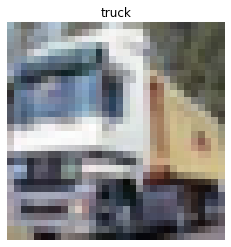

In [9]:
image = train_images[1]
label = int(train_labels[1])

print(f"""
     image shape : {image.shape}
     image dtype : {image.dtype}
     image class from food01: {label}
     class name (str form) : {class_names[label]}
     """ )
plt.imshow(image)
plt.title(class_names[label])
plt.axis(False);

In [10]:
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

#Make datasets faster
train_data = train_data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_data, test_data, len(train_data), len(test_data)

(<PrefetchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float64, tf.uint8)>,
 <PrefetchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float64, tf.uint8)>,
 1563,
 313)

In [12]:
# setup random seed
tf.random.set_seed(42)

#start time
start_time = timer()

# create a CNN model 
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(filters=10,
                            kernel_size = 3,
                            activation = 'relu',
                            input_shape=(32, 32, 3)),
     tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
     tf.keras.layers.MaxPool2D(pool_size=2, padding = "valid"),
     tf.keras.layers.Conv2D(10, 3, activation='relu'),
     tf.keras.layers.Conv2D(10, 3, activation='relu'),
     tf.keras.layers.MaxPool2D(2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(10, activation='softmax')
    ], name='TinyVCG')

# compile the model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

#fit model
history = model.fit(train_data, epochs=EPOCHS, steps_per_epoch = len(train_data),
                    validation_data=test_data, validation_steps=len(test_data))

# track time
end_time = timer()
train_time = print_train_time(start_time, end_time, device=DEVICE)



Epoch 1/10
1563/1563 [==============================] - 22s 8ms/step - loss: 1.7037 - accuracy: 0.3809 - val_loss: 1.5031 - val_accuracy: 0.4634
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4281 - accuracy: 0.4897 - val_loss: 1.3824 - val_accuracy: 0.5080
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3318 - accuracy: 0.5278 - val_loss: 1.3041 - val_accuracy: 0.5366
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2656 - accuracy: 0.5531 - val_loss: 1.2564 - val_accuracy: 0.5533
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2176 - accuracy: 0.5702 - val_loss: 1.2312 - val_accuracy: 0.5653
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1821 - accuracy: 0.5833 - val_loss: 1.2067 - val_accuracy: 0.5730
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1535 - accuracy: 0.5936 - val_loss: 1.1869 - va

In [17]:
results = {
    "device": DEVICE,
    "dataset_name": DATASET_NAME,
    "epochs": EPOCHS,
    "batch_size":BATCH_SIZE,
    "num_train_samples": len(train_data)*BATCH_SIZE,
    "num_test_samples": len(test_data)*BATCH_SIZE,
    "total_train_time": round(train_time, 3),
    "time_per_epoch": round(train_time/EPOCHS, 3),
    "model": model.name
}
results_df = pd.DataFrame(results, index=[0])
results_df

,device,dataset_name,epochs,batch_size,num_train_samples,num_test_samples,total_train_time,time_per_epoch,model
0,Google Colab (K80 GPU),cifar10,10,32,50016,10016,187.4,18.74,TinyVCG
